## Exploratory Data Analysis of Risky Loan Applications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format 

df = pd.read_csv('loan.csv')

### Data Cleaning, Data Manipulation and Derived Metrics

In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [3]:
# A lot of columns show NaN values in describe
# Annual income looks very skewed, potential outliers

df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


In [4]:
df.isnull().values.any()

True

In [5]:
# Checking for columns that have more than 1 unique value
# Shape says 48 compared to 111 earlier which means 63 columns have a single value (NA, 1, etc)

df_unique = df.nunique(axis=0)
df_unique = df_unique[df_unique[:]>1]
df_unique.shape

(48,)

In [6]:
# Drop columns with only one or no unique value excluding NaN

for col in df.columns:
    if len(df[col].dropna().unique()) <= 1:
        df.drop(col,inplace=True,axis=1)
df.shape

(39717, 48)

In [7]:
df.isnull().all(axis=0).sum()

0

In [8]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
# There are some other columns which aren't null but they don't contribute in identifying loan status
# Remove those as well
df.drop(['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'last_credit_pull_d', 'mths_since_last_record'],inplace=True,axis=1)

In [10]:
# After removing non-unique columns, based on an initial look at the CSV
# We will remove unnecessary prefixes/suffixes from variables

# Remove % symbol from interest rate and revolving line utilisation rate

df['int_rate'] = df['int_rate'].apply(lambda x: str(x).rstrip('%'))
df['int_rate'] = df['int_rate'].astype(float)
print(df['int_rate'].head())

df['revol_util'] = df['revol_util'].apply(lambda x: str(x).rstrip('%'))
df['revol_util'] = df['revol_util'].astype(float)
(df['revol_util'].head())

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64


0   83.70
1    9.40
2   98.50
3   21.00
4   53.90
Name: revol_util, dtype: float64

In [11]:
# Remove +,> symbols and yaers suffix from employee length
# Fill NaN values with 0 and convert it to int type

df['emp_length'] = df['emp_length'].apply(lambda x: str(x).rstrip('years')).apply(lambda x: str(x).rstrip('year'))
df['emp_length'] = df['emp_length'].apply(lambda x: str(x).rstrip('+ ')).apply(lambda x: str(x).lstrip('< '))
df['emp_length'] = df['emp_length'].replace('nan', '0').astype(int)
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: int64

In [12]:
# Issue Dates are in the format MMM-YY
# Month and Year can be extracted separately to form derived metric

issue_date = df['issue_d'].str.partition("-", True)     
df['issue_month'] = issue_date[0]                       
df['issue_year'] = '20' + issue_date[2]
print(df['issue_month'].head())
print(df['issue_year'].head())

0    Dec
1    Dec
2    Dec
3    Dec
4    Dec
Name: issue_month, dtype: object
0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: object


### Outlier detection and removal

In [13]:
# Based on statistics and an early run of box plots; we clearly see outliers in some fields
# So we fix them before analysing and creating visualisations

df = df[df['loan_amnt'] <= df['loan_amnt'].quantile(0.95)]
df = df[df['int_rate'] <= df['int_rate'].quantile(0.95)]
df = df[df['installment'] <= df['installment'].quantile(0.95)]
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.95)]

### Data Analysis

['Fully Paid' 'Charged Off' 'Current']
loan_status
Fully Paid     84.4%
Charged Off    13.4%
Current         2.3%
Name: proportion, dtype: object


Text(0, 0.5, 'Total Count')

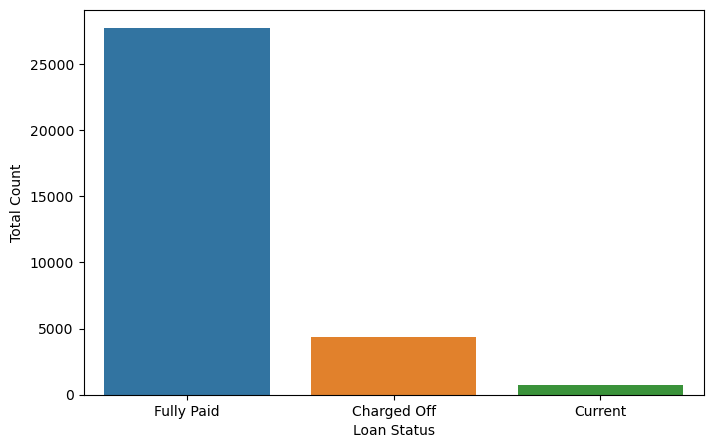

In [14]:
# Based on initial analysis, loan status is of the type - Fully Paid, Charged Off, Current
# 83% applicants fully paid the loan while roughly 14% defaulted

# We need to focus on Charged Off to identify applicants like to be charged off in the future

print(df['loan_status'].unique())
print(df['loan_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(8,5))
ax = sns.countplot(x="loan_status",data=df)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Total Count')

In [15]:
df_paid = df[df['loan_status'] == 'Fully Paid']
print(df_paid.shape)
df_charged = df[df['loan_status'] == 'Charged Off']
print(df_charged.shape)
df_current = df[df['loan_status'] == 'Current']
print(df_current.shape)

(27716, 42)
(4398, 42)
(741, 42)


### Ordered and Unordered Categoric Variables - Univariate and Bivariate Analysis

count     32855
unique        6
top           B
freq      10439
Name: grade, dtype: object
['B' 'C' 'A' 'D' 'E' 'F']


Distribution of Charged Off Applicants
grade
B    29.1%
C    27.8%
D    21.8%
A    13.1%
E     7.6%
F     0.6%
Name: proportion, dtype: object


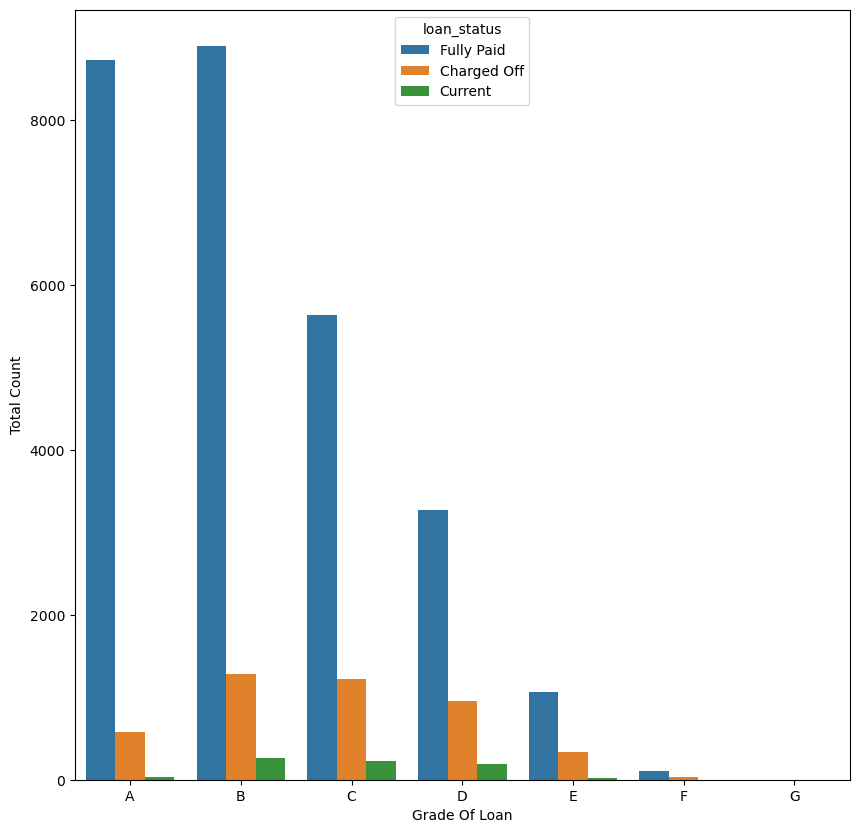

In [16]:
# Variable - Grade
# In general, maximum of applicants belong to grade B
# Both highest defaulters and highest fully paid applicants belong to grade B

print(df['grade'].describe())
print(df['grade'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['grade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize = (10,10))
ax = sns.countplot(x="grade", data=df, hue='loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set_xlabel('Grade Of Loan')
ax.set_ylabel('Total Count')
plt.show()


count                  32855
unique                    14
top       debt_consolidation
freq                   15100
Name: purpose, dtype: object
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


Distribution of Charged Off Applicants
purpose
debt_consolidation    47.7%
other                 12.0%
credit_card            9.8%
small_business         7.1%
home_improvement       6.1%
major_purchase         4.6%
car                    3.4%
medical                2.1%
moving                 1.9%
wedding                1.7%
vacation               1.2%
educational            1.2%
house                  0.9%
renewable_energy       0.4%
Name: proportion, dtype: object


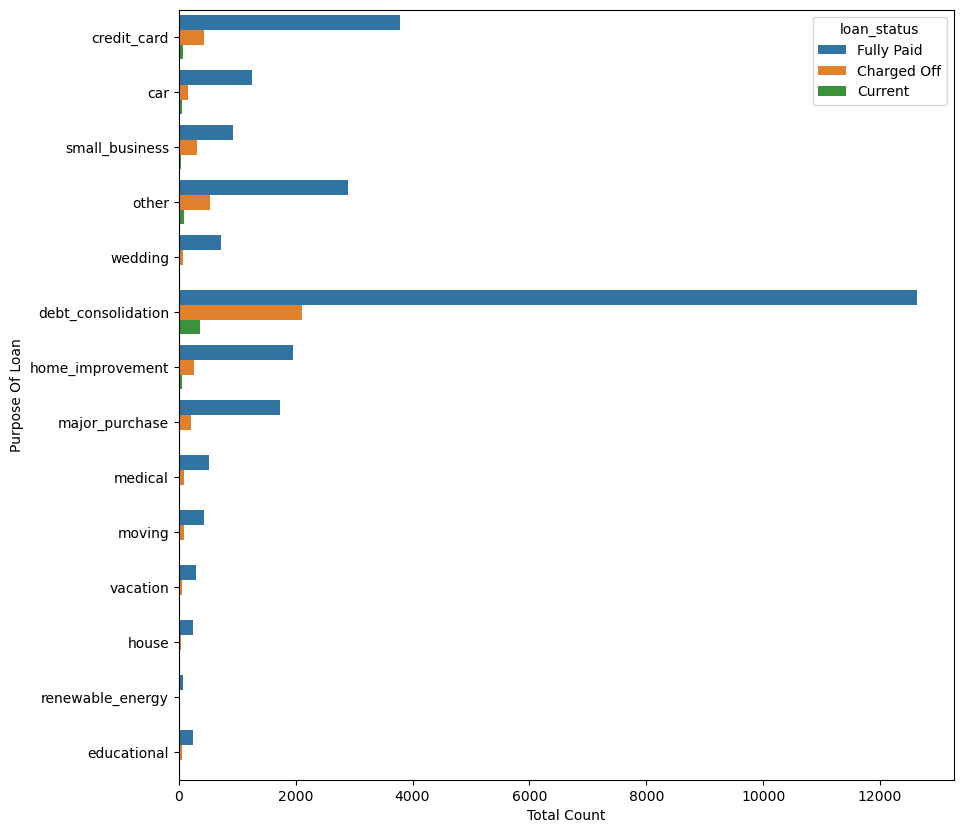

In [17]:
# Variable - Purpose
# Applicants with debt consolidation purpose have highest risk of default
# This number is followed by others, small businesses and credit cards

print(df['purpose'].describe())
print(df['purpose'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize = (10,10))
ax = sns.countplot(y="purpose", data=df, hue='loan_status')
ax.set_ylabel('Purpose Of Loan')
ax.set_xlabel('Total Count')
plt.show()

count     32855
unique        5
top        RENT
freq      16501
Name: home_ownership, dtype: object
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


Distribution of Charged Off Applicants
home_ownership
RENT        53.0%
MORTGAGE    38.7%
OWN          8.0%
OTHER        0.4%
Name: proportion, dtype: object


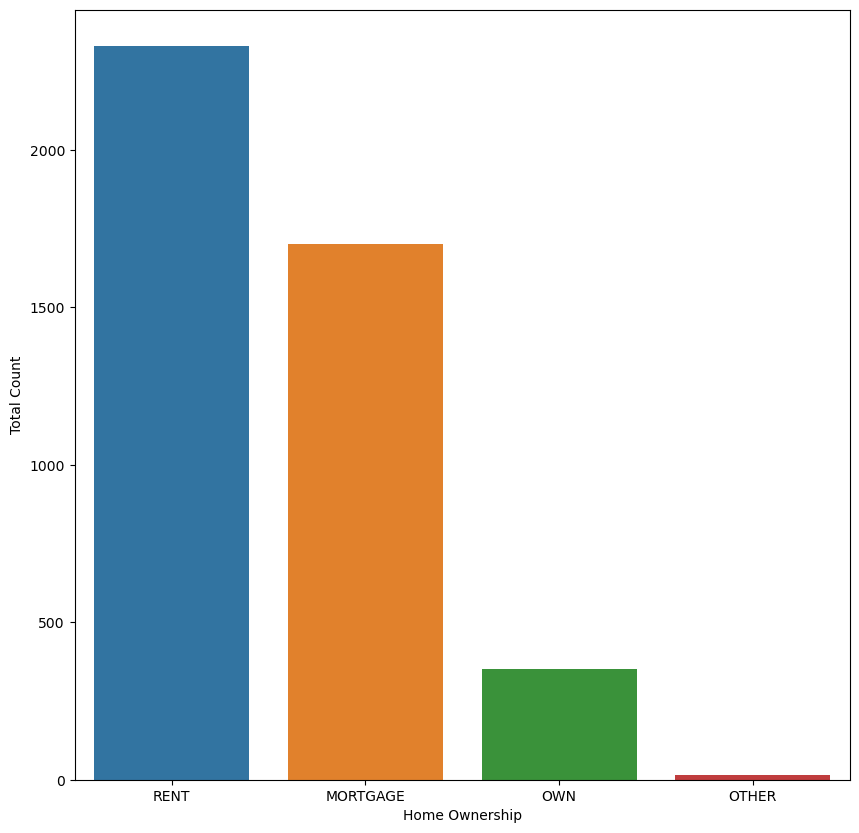

In [18]:
# Variable - Home Ownership
# Applicants on Rent are at maximum risk followed by Mortgage

print(df['home_ownership'].describe())
print(df['home_ownership'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['home_ownership'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(10,10))
ax = sns.countplot(x="home_ownership", data=df_charged)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Total Count')      
plt.show()

count     32855
unique       50
top          CA
freq       5805
Name: addr_state, dtype: object
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'NY' 'PA' 'FL'
 'MN' 'KY' 'OH' 'SC' 'NJ' 'RI' 'LA' 'MA' 'WI' 'AL' 'WA' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'DC' 'SD' 'NH' 'AR' 'NM' 'MI' 'MT' 'HI' 'OK' 'DE'
 'WY' 'MS' 'IA' 'TN' 'NE' 'ID' 'IN' 'ME']


Distribution of Charged Off Applicants
addr_state
CA    20.0%
FL     8.8%
NY     8.8%
TX     5.0%
NJ     4.9%
GA     3.9%
IL     3.6%
PA     3.4%
VA     2.9%
MA     2.9%
MD     2.8%
OH     2.8%
WA     2.4%
MO     2.3%
AZ     2.2%
NC     2.0%
NV     1.9%
MI     1.8%
CO     1.8%
CT     1.7%
MN     1.6%
OR     1.3%
SC     1.1%
LA     1.1%
WI     1.0%
AL     0.9%
KY     0.9%
OK     0.8%
NM     0.6%
KS     0.6%
AR     0.5%
UT     0.5%
HI     0.5%
RI     0.5%
WV     0.5%
NH     0.4%
DC     0.2%
SD     0.2%
DE     0.2%
MT     0.2%
AK     0.2%
VT     0.1%
WY     0.1%
NE     0.1%
MS     0.0%
TN     0.0%
ID     0.0%
Name: proportion, dtype: object


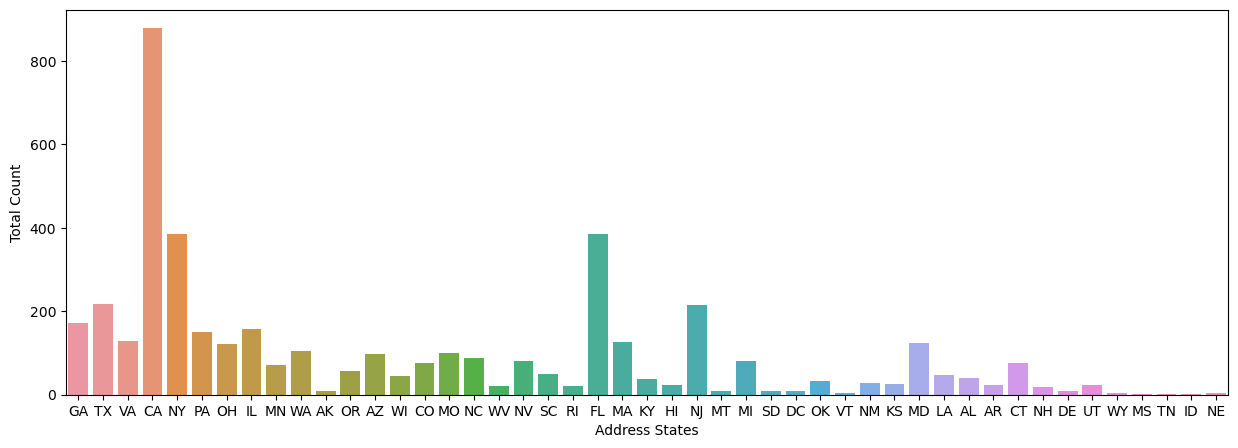

In [19]:
# Variable - Address State
# The top 3 states having higher chance of defaulter applicants are CA, FL, NY

print(df['addr_state'].describe())
print(df['addr_state'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['addr_state'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(15,5))
ax = sns.countplot(x="addr_state", data=df_charged)
ax.set_xlabel('Address States')
ax.set_ylabel('Total Count')      
plt.show()

count            32855
unique               3
top       Not Verified
freq             15677
Name: verification_status, dtype: object
['Verified' 'Source Verified' 'Not Verified']


Distribution of Charged Off Applicants
verification_status
Not Verified       44.1%
Verified           29.7%
Source Verified    26.1%
Name: proportion, dtype: object


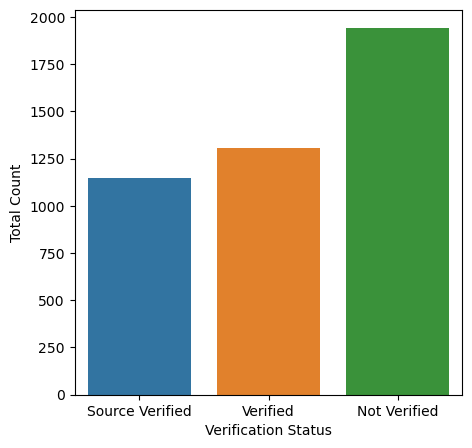

In [20]:
# Variable - Verification Status
# The percentages of both verified and not verified defaulter candidates are very close
# Hence the verification system needs to be revisited

print(df['verification_status'].describe())
print(df['verification_status'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['verification_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(5,5))
ax = sns.countplot(x="verification_status", data=df_charged)
ax.set_xlabel('Verification Status')
ax.set_ylabel('Total Count')      
plt.show()

count          32855
unique             2
top        36 months
freq           25291
Name: term, dtype: object
[' 36 months' ' 60 months']


Distribution of Charged Off Applicants
term
 36 months    63.3%
 60 months    36.7%
Name: proportion, dtype: object


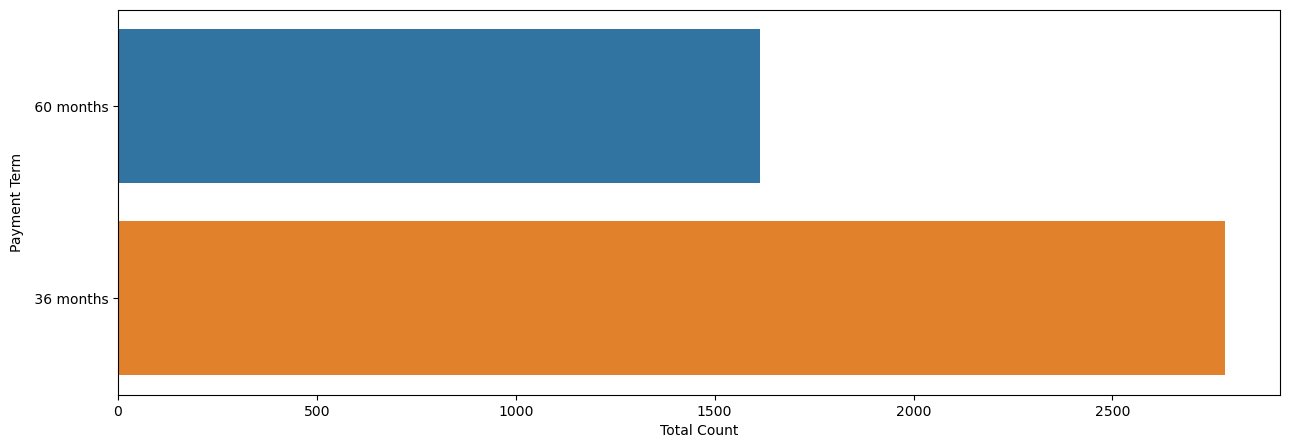

In [21]:
# Variable - Payment Term
# The applicants with lesser term (36 months) are more likely to default than the other (60 months)

print(df['term'].describe())
print(df['term'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['term'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(15,5))
ax = sns.countplot(y="term", data=df_charged)
ax.set_ylabel('Payment Term')
ax.set_xlabel('Total Count')      
plt.show()

count   32855.00
mean        4.80
std         3.43
min         0.00
25%         2.00
50%         4.00
75%         8.00
max        10.00
Name: emp_length, dtype: float64
[10  1  3  8  5  4  6  2  9  7  0]


Distribution of Charged Off Applicants
emp_length
10    21.6%
1     20.3%
2     10.3%
3     10.1%
4      8.2%
5      8.2%
6      5.5%
7      4.7%
0      4.7%
8      3.6%
9      2.7%
Name: proportion, dtype: object


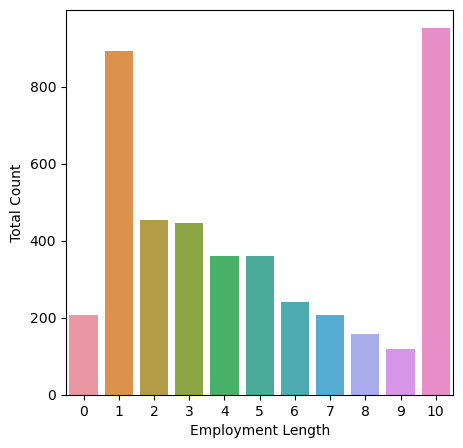

In [22]:
# Variable - Employee Length
# The defaulter applicants belong to extremes of the range - >= 1 year and <= 10 years

print(df['emp_length'].describe())
print(df['emp_length'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['emp_length'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(5,5))
ax = sns.countplot(x="emp_length", data=df_charged)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Total Count')      
plt.show()

count     32855
unique       12
top         Dec
freq       3536
Name: issue_month, dtype: object
['Dec' 'Nov' 'Oct' 'Sep' 'Aug' 'Jul' 'Jun' 'May' 'Apr' 'Mar' 'Feb' 'Jan']


count     32855
unique        5
top        2011
freq      17218
Name: issue_year, dtype: object
['2011' '2010' '2009' '2008' '2007']


Distribution of Charged Off Applicants
issue_month
Dec    11.5%
Nov    10.3%
Sep    10.0%
Oct     9.8%
Jun     8.5%
Jul     8.4%
May     8.3%
Aug     8.2%
Apr     7.2%
Mar     6.2%
Jan     6.1%
Feb     5.5%
Name: proportion, dtype: object


issue_year
2011    54.5%
2010    28.9%
2009    11.0%
2008     4.8%
2007     0.8%
Name: proportion, dtype: object


<Axes: xlabel='issue_year', ylabel='count'>

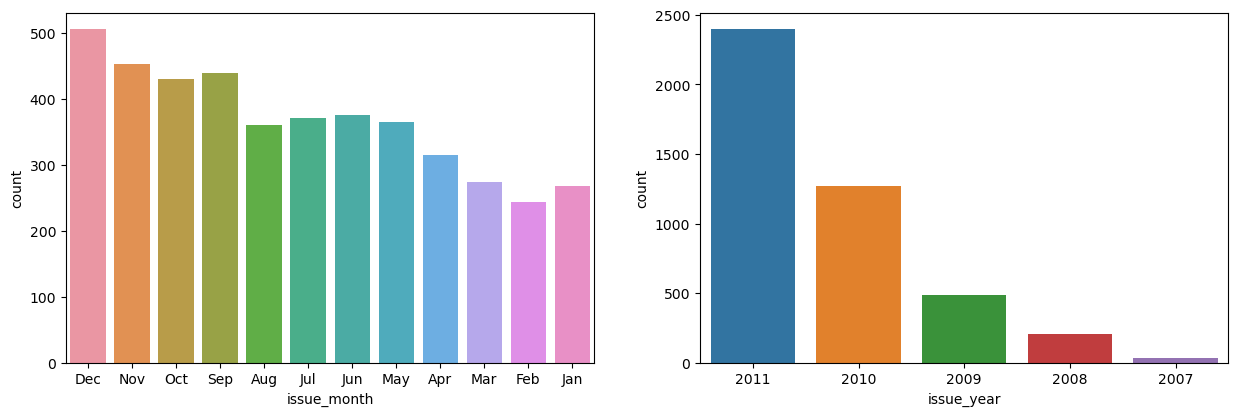

In [23]:
# Variable - Loan Issue Date (Month and Year)
# The applications are less likely to default at srting of year and more likely to default at end of year
# The maximum default applications belong to the year 2011

print(df['issue_month'].describe())
print(df['issue_month'].unique())
print('\n')
print(df['issue_year'].describe())
print(df['issue_year'].unique())
print('\n')
print('Distribution of Charged Off Applicants')
print(df_charged['issue_month'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print('\n')
print(df_charged['issue_year'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x='issue_month', data=df_charged)
plt.subplot(222)
sns.countplot(x='issue_year', data=df_charged)

### Quantitative or Numeric Variables - Univariate and Bivariate Analysis along with Outlier Detection

count   32855.00
mean     9300.03
std      5437.73
min       500.00
25%      5000.00
50%      8000.00
75%     12250.00
max     25000.00
Name: loan_amnt, dtype: float64


count   27716.00
mean     9109.98
std      5285.21
min       500.00
25%      5000.00
50%      8000.00
75%     12000.00
max     25000.00
Name: loan_amnt, dtype: float64


count    4398.00
mean     9719.86
std      5876.31
min       900.00
25%      5000.00
50%      8500.00
75%     14000.00
max     25000.00
Name: loan_amnt, dtype: float64


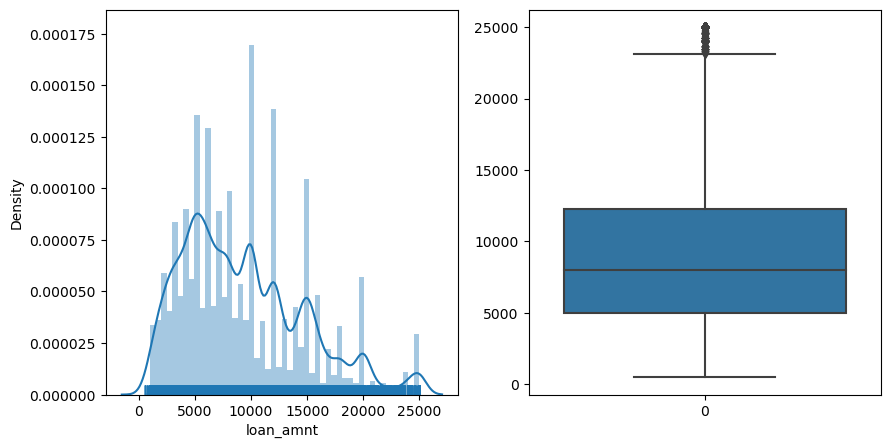

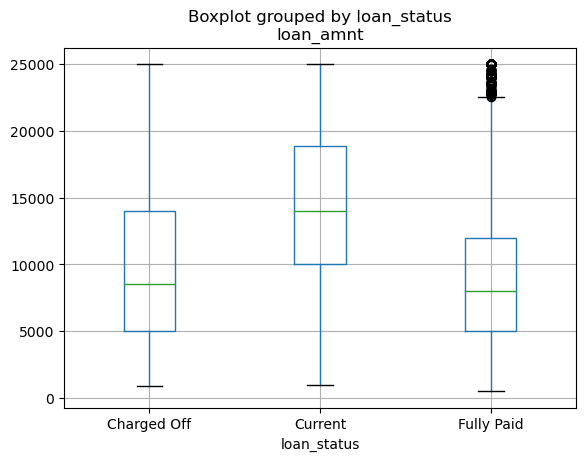

In [24]:
# Variable - Loan Amount
# We see that most of loan amount lies between 5500 - 15000 (Q1 - Q3)
# Also, the loan amount of Charged Off applicants is slightly higher than Fully Paid

print(df['loan_amnt'].describe())
print('\n')
print(df_paid['loan_amnt'].describe())
print('\n')
print(df_charged['loan_amnt'].describe())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.loan_amnt)
df.boxplot(by ='loan_status', column =['loan_amnt'])
plt.show()

count   32855.00
mean       11.42
std         3.27
min         5.42
25%         8.59
50%        11.49
75%        13.80
max        18.25
Name: int_rate, dtype: float64


count   27716.00
mean       11.13
std         3.24
min         5.42
25%         7.90
50%        11.11
75%        13.49
max        18.25
Name: int_rate, dtype: float64


count   4398.00
mean      12.85
std        3.01
min        5.42
25%       10.75
50%       12.99
75%       15.23
max       18.25
Name: int_rate, dtype: float64


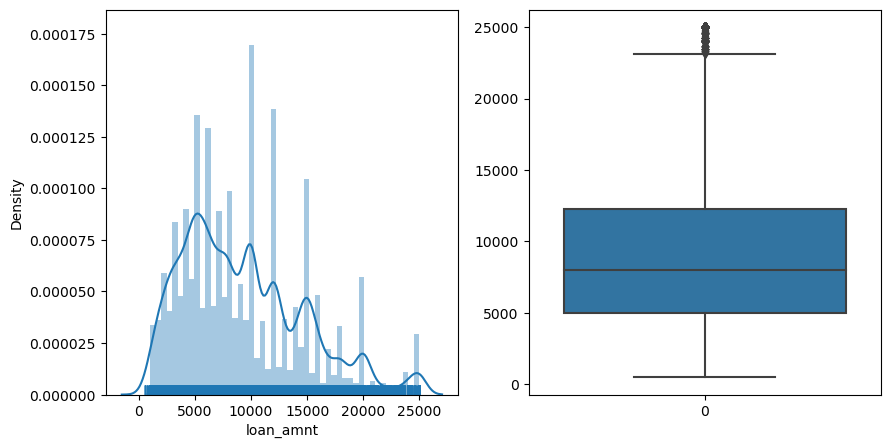

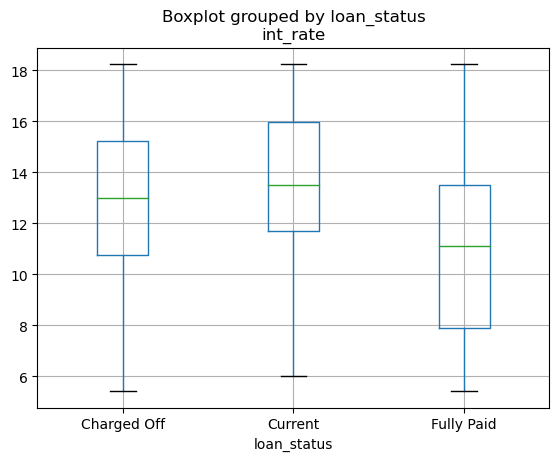

In [25]:
# Variable - Interest Rate
# We see that most of interest rate lies between 9% - 15% (Q1 - Q3)
# Also, the interest rate of Charged Off applicants is significantly higher than Fully Paid

print(df['int_rate'].describe())
print('\n')
print(df_paid['int_rate'].describe())
print('\n')
print(df_charged['int_rate'].describe())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.loan_amnt)
df.boxplot(by ='loan_status', column =['int_rate'])
plt.show()

count   32855.00
mean      269.84
std       146.46
min        15.69
25%       155.70
50%       248.52
75%       365.23
max       661.52
Name: installment, dtype: float64


count   27716.00
mean      268.48
std       145.92
min        15.69
25%       155.56
50%       246.73
75%       363.93
max       661.52
Name: installment, dtype: float64


count   4398.00
mean     270.13
std      148.83
min       22.79
25%      154.09
50%      249.36
75%      368.63
max      661.52
Name: installment, dtype: float64


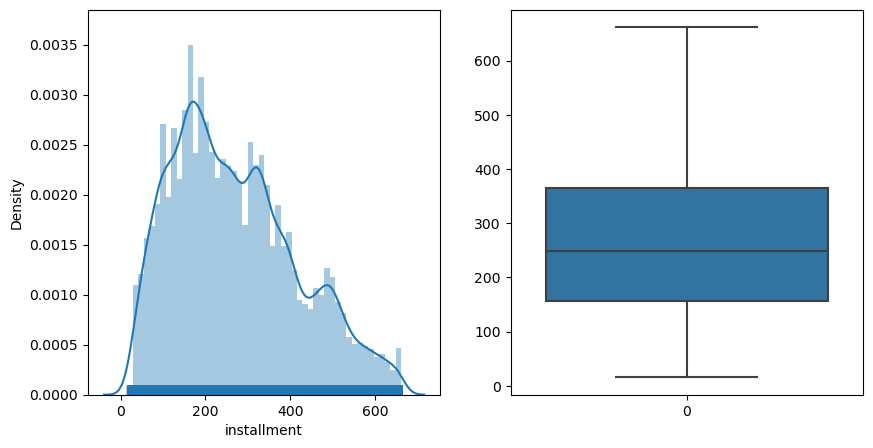

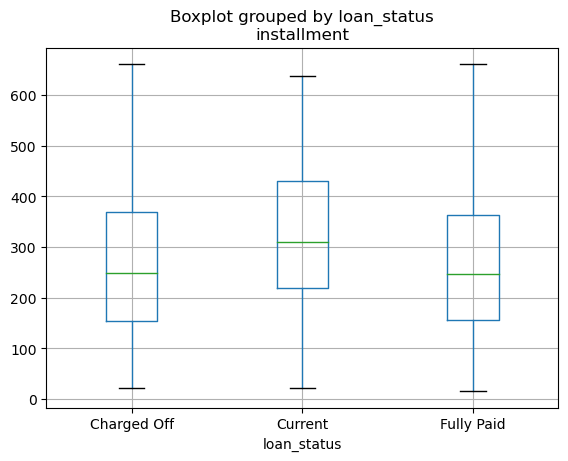

In [26]:
# Variable - Installment
# We see that most of interest rate lies between 167 - 430 (Q1 - Q3)
# Also, the installment of Charged Off applicants is slightly higher than Fully Paid

print(df['installment'].describe())
print('\n')
print(df_paid['installment'].describe())
print('\n')
print(df_charged['installment'].describe())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(a=df.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.installment)
df.boxplot(by ='loan_status', column =['installment'])
plt.show()

count   32855.00
mean       13.43
std         6.71
min         0.00
25%         8.28
50%        13.51
75%        18.73
max        29.99
Name: dti, dtype: float64


count   27716.00
mean       13.27
std         6.70
min         0.00
25%         8.07
50%        13.33
75%        18.56
max        29.99
Name: dti, dtype: float64


count   4398.00
mean      14.11
std        6.64
min        0.00
25%        9.14
50%       14.40
75%       19.54
max       29.85
Name: dti, dtype: float64


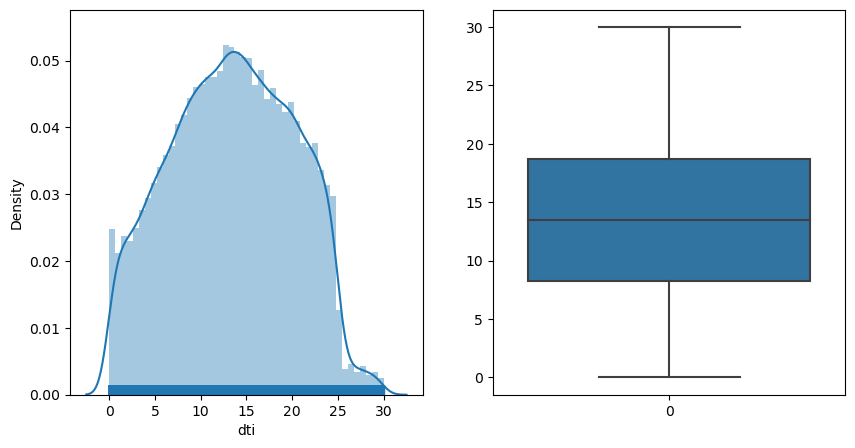

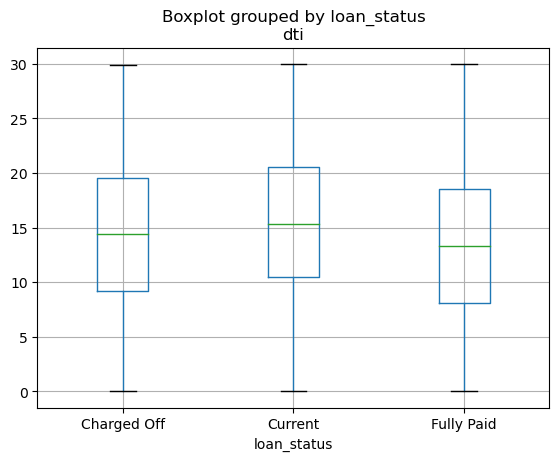

In [27]:
# Variable - Debt to Income Ratio
# We see that most of ratio lies between 8% - 19% (Q1 - Q3)
# Also, the ration of Charged Off applicants is slightly higher than Fully Paid

print(df['dti'].describe())
print('\n')
print(df_paid['dti'].describe())
print('\n')
print(df_charged['dti'].describe())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(a=df.dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.dti)
df.boxplot(by ='loan_status', column =['dti'])
plt.show()

count    32855.00
mean     57424.68
std      25296.01
min       4000.00
25%      38400.00
50%      53200.00
75%      73000.00
max     129996.00
Name: annual_inc, dtype: float64


count    27716.00
mean     58158.40
std      25433.00
min       4000.00
25%      39600.00
50%      54000.00
75%      74530.00
max     129996.00
Name: annual_inc, dtype: float64


count     4398.00
mean     52213.57
std      23946.95
min       4080.00
25%      35000.00
50%      48000.00
75%      65000.00
max     129996.00
Name: annual_inc, dtype: float64


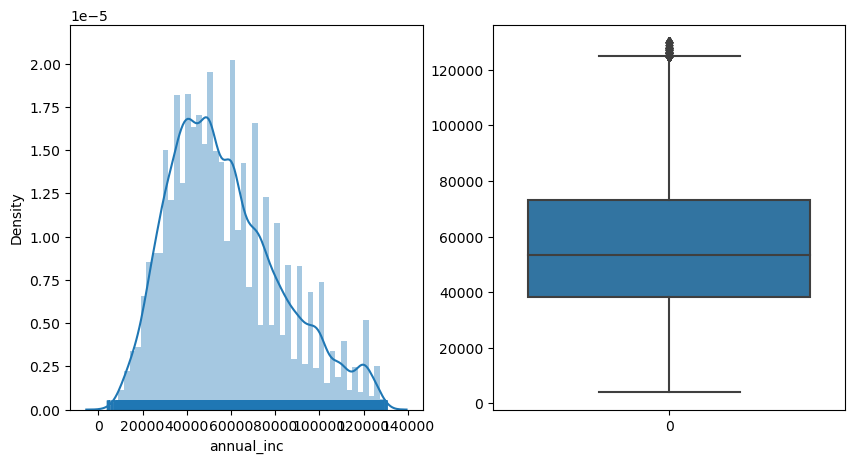

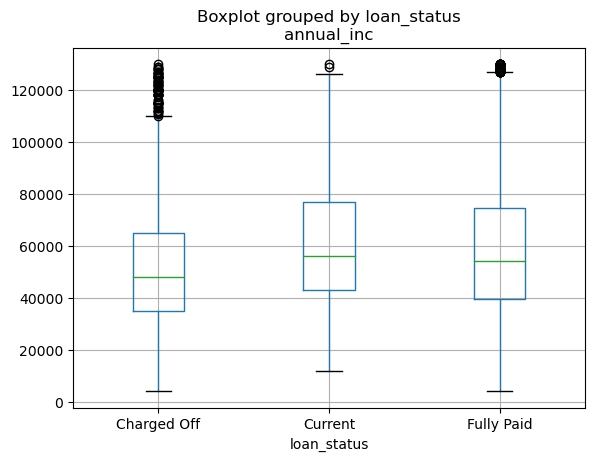

In [28]:
# Variable - Annual Income
# We see that most of annual income lies between 38K - 73K (Q1 - Q3)
# Also, the interest rate of Charged Off applicants is significantly higher than Fully Paid

print(df['annual_inc'].describe())
print('\n')
print(df_paid['annual_inc'].describe())
print('\n')
print(df_charged['annual_inc'].describe())

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(a=df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.annual_inc)
df.boxplot(by ='loan_status', column =['annual_inc'])
plt.show()

### Bivariate Analysis other than Loan Status

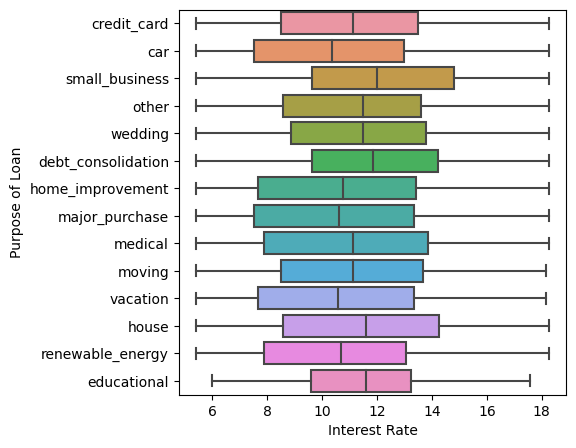

In [29]:
# Purpose vs Interest Rate
# House loans seem to have maximum interest rate median, followed by debt consolidation and small business

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='int_rate', y='purpose', data = df)
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

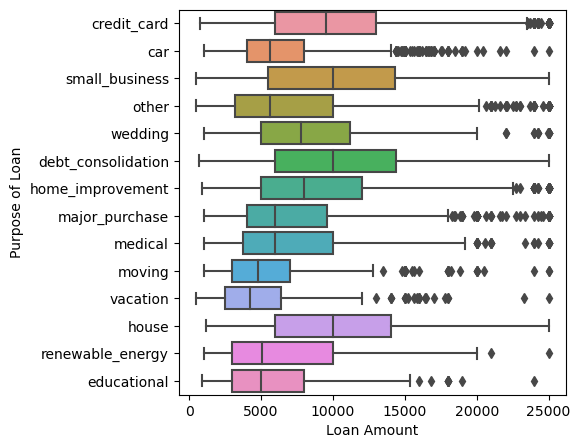

In [30]:
# Purpose vs Loan Amount
# Again, House loans seem to have maximum loan amount median, followed by debt consolidation and small business

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='loan_amnt', y='purpose', data = df)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Purpose of Loan')
plt.show()

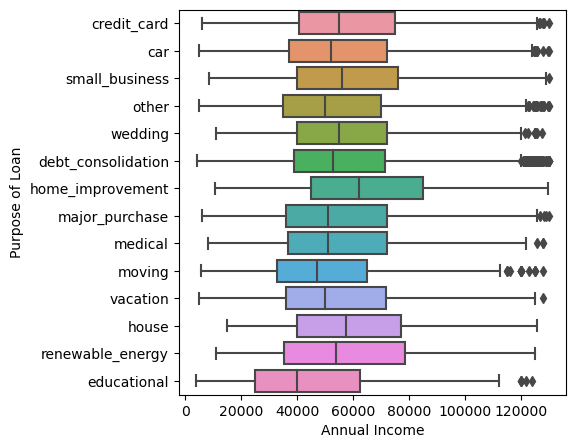

In [31]:
# Purpose vs Annual Income
# Higher income people tend to take loan for home improvement, house and renewable energy
# Income groups for other purposes are more or less same

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='annual_inc', y='purpose', data = df)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Purpose of Loan')
plt.show()

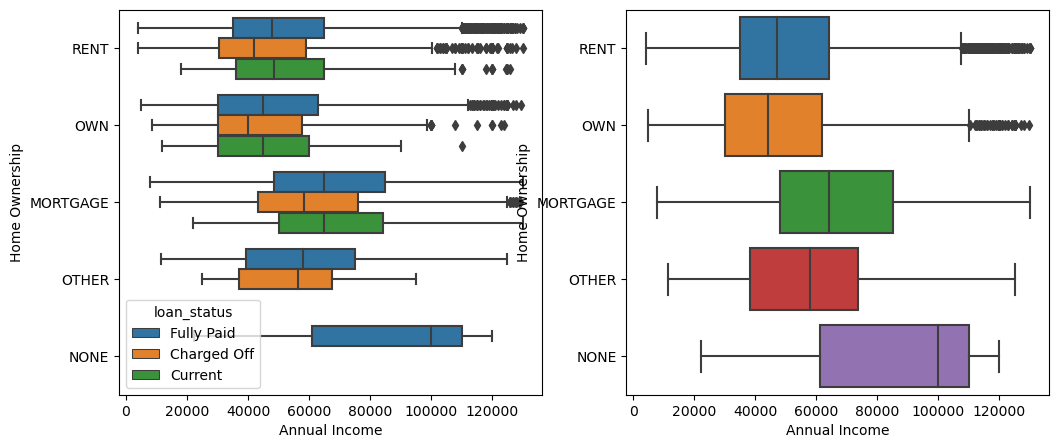

In [32]:
# Annual Income vs Home Ownership
# People with highest income seem to have no relation with ownership or on mortgage

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='annual_inc', y='home_ownership', data = df, hue='loan_status')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Home Ownership')
plt.subplot(1,2,2)
ax = sns.boxplot(x='annual_inc', y='home_ownership', data = df)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Home Ownership')
plt.show()

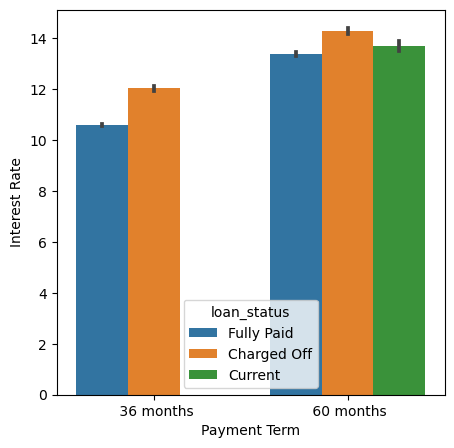

In [33]:
# Term vs Interest Rate
# Payment Term of 36 months seems to have lower interest rate

plt.figure(figsize=(5,5))
ax = sns.barplot(x='term', y='int_rate', data = df, hue='loan_status')
ax.set_xlabel('Payment Term')
ax.set_ylabel('Interest Rate')
plt.show()

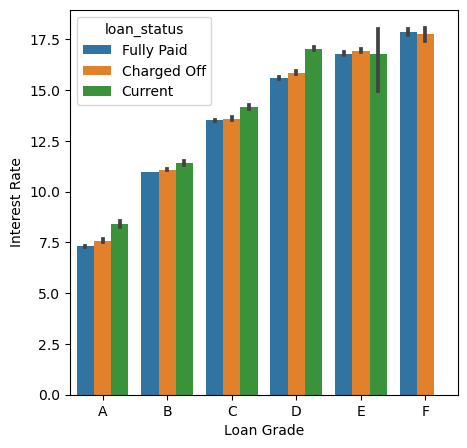

In [34]:
# Grade vs Interest Rate
# Interest Rate increases with grade

plt.figure(figsize=(5,5))
ax = sns.barplot(x='grade', y='int_rate', data = df, hue='loan_status', order=['A','B','C','D','E','F'])
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Interest Rate')
plt.show()

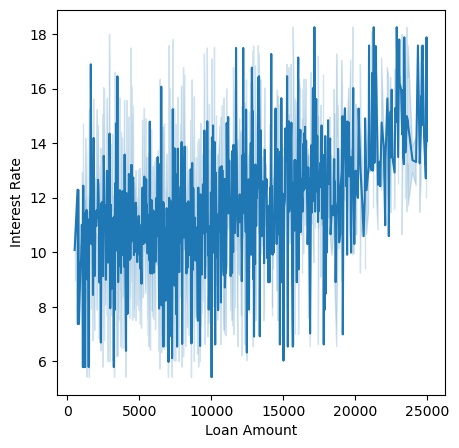

In [35]:
# Loan Amount vs Interest Rate
# Higher loan amount implies higher interest rate

plt.figure(figsize=(5,5))
ax = sns.lineplot(x='loan_amnt', y='int_rate', data = df)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Interest Rate')
plt.show()

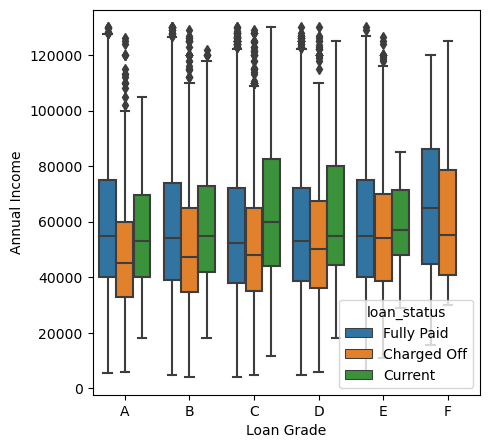

In [36]:
# Grade vs Annual Income

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='grade', y='annual_inc', data = df, order=['A','B','C','D','E','F'], hue='loan_status')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Annual Income')
plt.show()

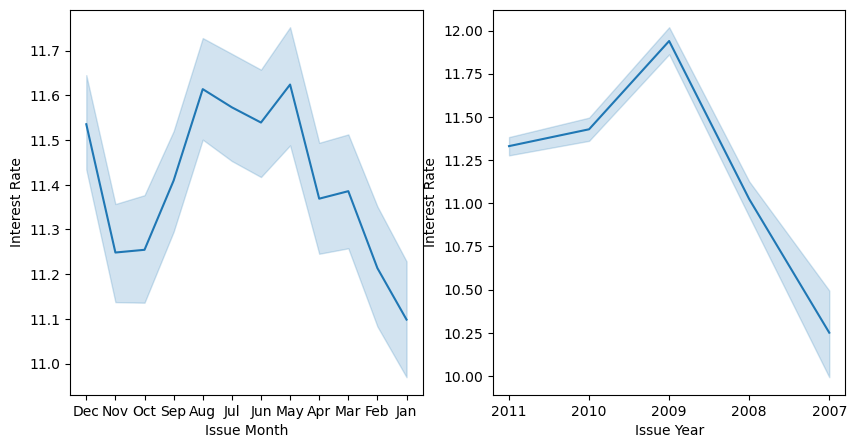

In [37]:
# Loan Issued Date vs Interest Rate
# Interest Rate rapidly increased over the years
# Interest rate is increases over months

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.lineplot(x='issue_month', y='int_rate', data = df)
ax.set_xlabel('Issue Month')
ax.set_ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.lineplot(x='issue_year', y='int_rate', data = df)
ax.set_xlabel('Issue Year')
ax.set_ylabel('Interest Rate')
plt.show()

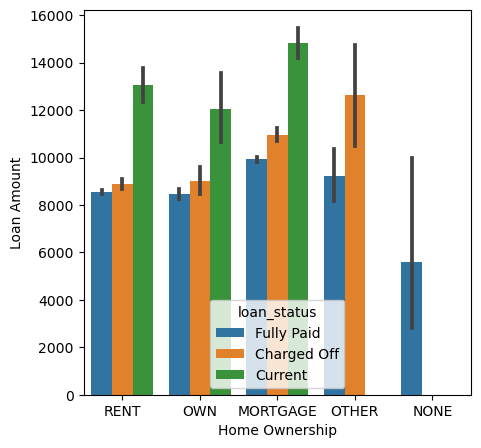

In [38]:
# Loan Amount vs Home Ownership
# People with mortgage and rent have higher loan amounts than people who own
plt.figure(figsize=(5,5))
ax = sns.barplot(x='home_ownership', y='loan_amnt', data = df, hue='loan_status')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Amount')
plt.show()

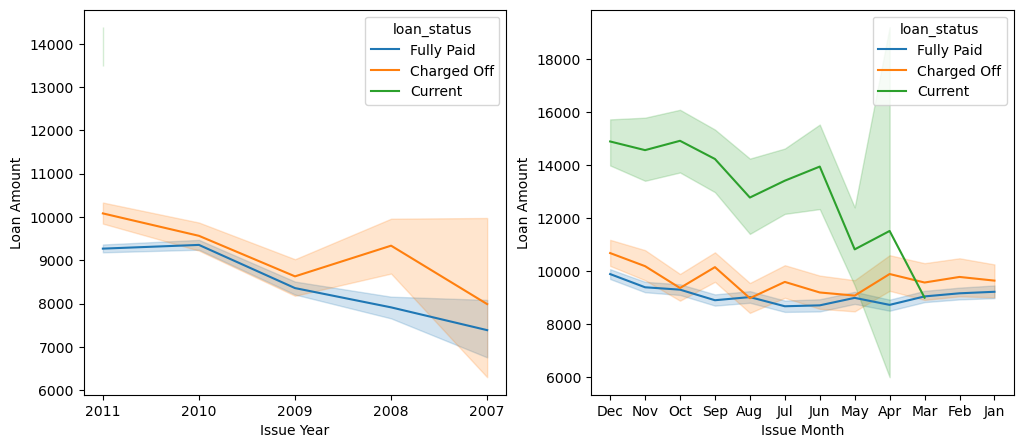

In [39]:
# Loan Amount vs Loan Issued Date
# Loan Amount increased over the years and months as well

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.lineplot(x='issue_year', y='loan_amnt', data = df, hue='loan_status')
ax.set_xlabel('Issue Year')
ax.set_ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.lineplot(x='issue_month', y='loan_amnt', data = df, hue='loan_status')
ax.set_xlabel('Issue Month')
ax.set_ylabel('Loan Amount')
plt.show()

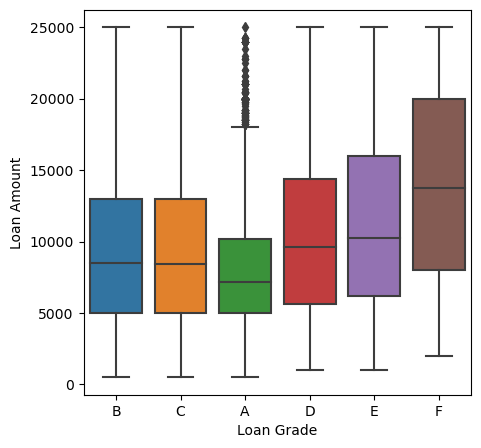

In [40]:
# Grade vs Loan Amount

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='grade', y='loan_amnt', data = df)
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Loan Amount')
plt.show()

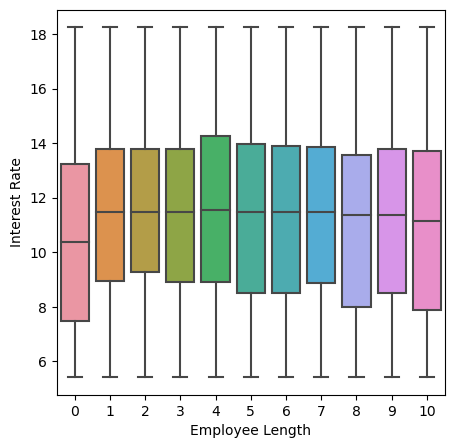

In [41]:
# Employee Length vs Interest Rate

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='emp_length', y='int_rate', data = df)
ax.set_xlabel('Employee Length')
ax.set_ylabel('Interest Rate')
plt.show()

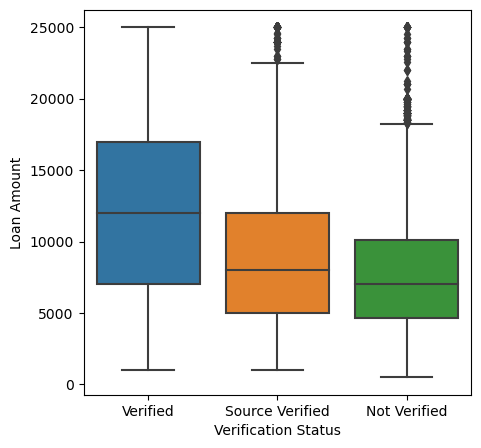

In [42]:
# Loan Amount vs Verification Status
# Verified applicants have higher loan amounts

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='verification_status', y='loan_amnt', data = df)
ax.set_xlabel('Verification Status')
ax.set_ylabel('Loan Amount')
plt.show()

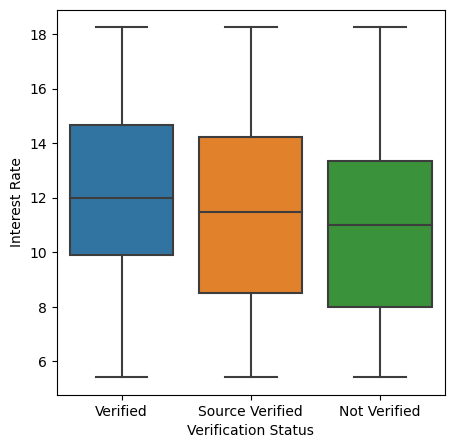

In [43]:
# Interest Rate vs Verification Status
# Verified applicants are charged higher interest rate

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='verification_status', y='int_rate', data = df)
ax.set_xlabel('Verification Status')
ax.set_ylabel('Interest Rate')
plt.show()